## Algorithms and Data Structures in Python — Assignment 4 ##

The following assignment will test your understanding of topics covered in the first five weeks of the course. This assignment **will count towards your grade** and should be submitted through Canvas by **10.10.2024 at 23:59 (CEST)**. You are required to work and prepare your submissions in groups with 3 students per group. You can get at most 10 points for Assignment 4, which is 10\% of your final grade. 

1. For submission, please rename your notebook as ```group_{i}_assignment4.ipynb```. For example, submission by group 1 should have the filename ```group_1_assignment4.ipynb```.

2. Please follow the function prototype specified in the question for writing your code. The usage of additional functions is acceptable unless the problem expressly prohibits it. If this structure is modified, it will fail automated testing steps.

3. All submissions will be checked for code similarity. Submissions with high similarity will be summarily rejected and no points will be awarded.

4. Please do NOT use the ```input()``` function in your code. 

5. For each exercise the correct solution counts for the 80% of the exercise's points, while code style counts for the remaining 20%. Please, make sure that you explain what your implementation does using comments.

6. Usage of ```dataclasses``` is not allowed.

### Working with Classes ###

Travel agents work with various planning applications to get real-time travel information to serve their clients. In this assignment, you will build a complete product that will offer travel agents the ability to add, delete and update railway travel information for several railway stations in the country (Netherlands), while still being able to view complex connections with a single command. You will be storing this information in a graph. A graph is composed of nodes (vertices) connected with edges. The nodes in our problem are railway stations, while the edges are railway connections between them.

For this exercise, you will write two classes:

1. The ```RailwayStation``` class stores attributes commonly associated with railway stations (e.g. railway station name, railway station code, inbound and outbound connections) in a single place.

2. The ```RailwayNetwork``` class  stores connections between these stations and provides an interface for travel agents to work with ```RailwayStation``` objects and build their own travel networks.

Let's look at these classes individually.

#### Problem 1: The ```RailwayStation``` class (4 points) ####

The ```RailwayStation``` class stores information associated with a railway station. This class must define the following attributes:


1. ```railway_station_name``` should accept the railway station name and save it within an instance variable.


2. ```railway_station_code``` should accept the railway station code and save it within an instance variable. Two distinct railway stations cannot have the same railway_station_code. Information about railway stations names and their respective codes (for railway stations in the Netherlands) can be found [here](https://en.wikipedia.org/wiki/Railway_stations_in_the_Netherlands) (in the **List of stations, with their official abbreviations** section). Write an appropriate setter method to ensure that the supplied railway station code complies with the general structure of a station code (string without numerical information, 3-4 characters long).


3. ```inbound_connections``` stores all destinations with an incoming train into this station.


4. ```outbound_connections``` stores a dictionary of destinations that can be reached from this railway station. The key for the dictionary is the ```railway_station_code``` of the destination and the value is ticket price.


In addition to these functions, you must also keep the following design constraints in mind:

1. The ```RailwayStation``` class is only intended to be accessed from the ```Network``` class that will be introduced shortly.


2. The class should define its ```__init__``` and ```__str__``` methods appropriately.


3. The ```RailwayStation``` class must additionally implement setter and deleter methods for adding and removing railways stations from ```inbound_connections``` and ```outbound_connections```.

The structure for ```RailwayStation``` class is provided below:

```python
class RailwayStation:
  def __init__(self, railway_station_name, railway_station_code):
    pass

  def __str__(self):
    pass

  def __repr__(self):
    pass

  def set_inbound_connection(self, railway_station_code):
    # Add an inbound connection to this railway station.
    pass

  def delete_inbound_connection(self, railway_station_code):
    # Delete an inbound connection to this railway station.
    pass

  def set_outbound_connection(self, railway_station_code, ticket_price):
    # Add an outbound connection from this railway station to a destination and the ticket price.
    pass

  def delete_outbound_connection(self, railway_station_code):
    # Delete an outbound connection from this railway station to a destination.
    pass
```

Please ensure that your indentation is correct.

In [1]:
class RailwayStation():
    station_names = set()
    def __init__(self, railway_station_name, railway_station_code):
        self.name = railway_station_name
        self.code = None
        self.set_code(railway_station_code)

        self.inbound_connections = []
        self.outbound_connections = {}

    def __str__(self):
        return f'{self.name}'

    def __repr__(self):
        return f'RailwayStation(name: {self.name}, code: {self.code})'
    
    def set_code(self, railway_station_code):
        """
        Validates the railway station code - the code must be a string without any numerical information and contain 3-5 characters.
        If validation passes, the station code is set.
        """
        if not isinstance(railway_station_code, str):
            raise ValueError('Station code must be a string.')
        
        if not railway_station_code.isalpha():
            raise ValueError('Station code must not contain numerical information.')
        
        if not (3 <= len(railway_station_code) <= 5):
            raise ValueError('Station code must be 3-5 characters long. ')
        
        self.code = railway_station_code

    def set_inbound_connection(self, railway_station_code):
        # Add an inbound connection to this railway station.
        if railway_station_code not in self.inbound_connections:
            self.inbound_connections.append(railway_station_code)
        else:
            print(f'Inbound connection from {railway_station_code} already exists.')

    def delete_inbound_connection(self, railway_station_code):
        # Delete an inbound connection to this railway station.
        if railway_station_code in self.inbound_connections:
            self.inbound_connections.remove(railway_station_code)

        else:
            print(f'No inbound connection from {railway_station_code} to delete.')

    def set_outbound_connection(self, railway_station_code, ticket_price):
        # Add an outbound connection from this wailway station to a destination and the ticket price.
        if railway_station_code not in self.outbound_connections:
         self.outbound_connections[railway_station_code] = ticket_price

        else:
            print(f'Outbound connection to {railway_station_code} already exists.')


    def delete_outbound_connection(self, railway_station_code):
        # Delete an outbound connection from this railway station to a destination.
        if railway_station_code in self.outbound_connections:
            del self.outbound_connections[railway_station_code]

        else:
            print(f'No outbound connection to {railway_station_code} to delete.')

#### Problem 2: The ```RailwayNetwork``` class (6 points) ####

The ```RailwayStation``` class takes care of individual railway stations. A railway network can contain hundreds of such railway stations. You will now build a ```RailwayNetwork``` class with the following functions:

1. ```def add_railway_station(self, railway_station_name, railway_station_code)``` adds a railway station with its respective name (e.g. **Amsterdam Central**) and code (e.g. **Asd**) to the graph. Remember that railway station codes are always unique and an agent should not be allowed to add two RailwayStation objects with the same railway station code into a network. You are also asked to set the built-in class methods ```__init__``` and ```__str__``` properly so that the objects are properly initialized and their str() representations provide readable, well-formatted string representations.


2. ```def set_route(self, src_railway_station_code, dst_railway_station_code, ticket_price)``` should add a connection from the source railway station to the destination railway station with the specified ticket price. You will accept railway station codes for source and destination and raise appropriate errors if the user tries to overwrite existing routes. This function will also update the inbound and outbound connection attributes for the source and destination RailwayStation objects.

3. ```def modify_route_price(self, src_railway_station_code, dst_railway_station_code, new_ticket_price)``` which should modify the price of an existing route from the source railway station to the destination railway station. You will accept railway station codes for source and destination and raise appropriate errors if the user tries to modify non-existent routes or supply invalid data.


4. ```def del_route(self, src_railway_station_code, dst_railway_station_code)``` which should delete the route and update the appropriate attributes of the source and destination RailwayStation objects.

6. ```def get_network_graph(self)``` uses information about nodes and their outbound connections for all RailwayStation objects in the Network instance to build a graphical representation of connectivity. You can look up https://python-graph-gallery.com/ on how to build these graphs. 

The ```RailwayNetwork``` class should follow the function prototype as given below:


```python
class RailwayNetwork:
  def __init__(self):
      pass
  
  def add_railway_station(self, railway_station_name, railway_station_code):
      pass
    
  def set_route(self, src_railway_station_code, dst_railway_station_code, price):
      pass

  def modify_route_price(self, src_railway_station_code, dst_railway_station_code, new_price):
      pass

  def del_route(self, src_railway_station_code, dst_railway_station_code):
      pass
  
  def get_network_graph(self):
      pass
```

__NOTE__ : Raise appropriate errors if somebody tries to modify non-existent relations or supply invalid data.

### Some Example Inputs 

Below are some example inputs. Please note that these commands represent only a small set of possible commands that your program may be tested against.

```python
n = RailwayNetwork()

# Add railway stations.
n.add_railway_station('Amsterdam Central', 'Asd')
n.add_railway_station('Amsterdam Zuid', 'Asdz')
n.add_railway_station('Amsterdam Rai', 'Rai')
n.add_railway_station('Haarlem', 'Hlm')
n.add_railway_station('Weesp', 'Wp')
n.add_railway_station('Utrecht Centraal', 'Ut')

# Add routes between railway stations and set the ticket price.
n.set_route('Asdz', 'Rai', 1)
n.set_route('Asdz', 'Asd', 3)
n.set_route('Rai', 'Asd', 1)
n.set_route('Hlm', 'Asd', 2)
n.set_route('Wp', 'Asd', 2)
n.set_route('Wp', 'Ut', 3)
n.set_route('Asd', 'Ut', 5)

# Visualize the Railway Network.
n.get_network_graph()

```

Now a few things to keep in mind:

1. This homework will be manually evaluated and points are earmarked for code cleanliness and comments. Pay special emphasis on testing your code with sufficient examples.

2. Set the built-in class methods ```__init__``` and ```__str__``` properly so that the objects are properly initialized and their ```str()``` representations provide readable, well-formatted information.

The connection does not exist. Try setting the route instead.
Railway Network


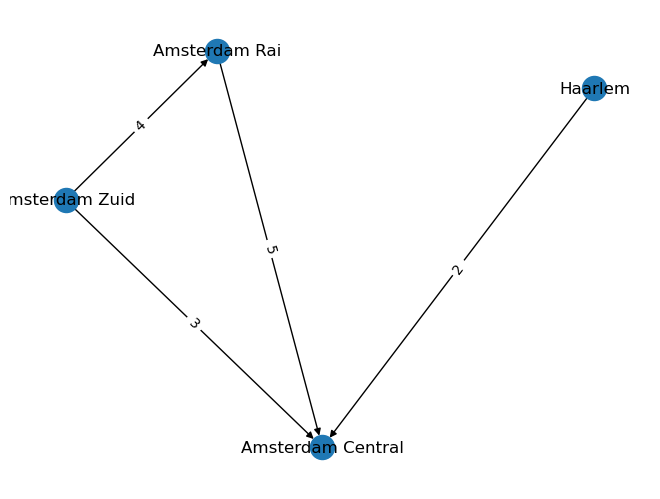

In [7]:
import networkx as nx


class RailwayNetwork:
  def __init__(self):
      # Initiate network, name it and create an empty list to store the stations
      self.network = nx.DiGraph()
      self.name = 'Railway Network'
      self.stations = {}

  def __str__(self):
    # Returns name of the network
    return self.name
  
  def add_railway_station(self, railway_station_name, railway_station_code):
     # Creates the station as an object, creates a node on the graph and stores it in a dictionary
     station = RailwayStation(railway_station_name, railway_station_code)
     self.stations[railway_station_code] = station
     self.network.add_node(station)

  def access_station_objects(self, src_railway_station_code, dst_railway_station_code):
    # Tries to find the station by its code and get the object. If it fails, raises an error. If succesful, return the object of both stations
    try:
        src_station = self.stations[src_railway_station_code]
        dst_station = self.stations[dst_railway_station_code]
    except KeyError as e:
        raise KeyError(f'Railway Station Code "{e.args[0]}" does not exist. Try again.')
    
    return src_station, dst_station
  
  def update_connections(self, src_station, dst_station, price):
     # Uses functions from RailwayStation to maintain the connections in a station
     src_station.set_outbound_connection(dst_station.code, price)
     dst_station.set_inbound_connection(src_station.code)

  def delete_connections(self, src_station, dst_station):
     # Uses functions from RailwayStation to maintain the connections in a station
     src_station.delete_outbound_connection(dst_station.code)
     dst_station.delete_inbound_connection(src_station.code)
    
  def set_route(self, src_railway_station_code, dst_railway_station_code, price):
      # Creates a directional route between two stations, using the price of the route as an attribute of the edge to show it visually
      src_station, dst_station = self.access_station_objects(src_railway_station_code, dst_railway_station_code)
      self.network.add_edge(src_station, dst_station, weight=price)
      self.update_connections(src_station, dst_station, price)

  def modify_route_price(self, src_railway_station_code, dst_railway_station_code, new_price):
      # Changes the price of an existing route and updates it. If route does not exist, prints an error and prompts to create the route
      src_station, dst_station = self.access_station_objects(src_railway_station_code, dst_railway_station_code)

      if dst_railway_station_code in src_station.outbound_connections and src_railway_station_code in dst_station.inbound_connections:
        self.update_connections(src_station, dst_station, new_price)
        self.network.add_edge(src_station, dst_station, weight=new_price)
      else:
         print('The connection does not exist. Try setting the route instead.')

  def del_route(self, src_railway_station_code, dst_railway_station_code):
      # Deletes an existing connection between two routes
      src_station, dst_station = self.access_station_objects(src_railway_station_code, dst_railway_station_code)
      self.delete_connections(src_station, dst_station)
      self.network.remove_edge(src_station, dst_station)

  def get_network_graph(self):
      # Draws the graph with station names and prices in a force-directed graph
      pos = nx.spring_layout(self.network)
      nx.draw(self.network, pos, with_labels=True)
      edge_labels = nx.get_edge_attributes(self.network, "weight")
      nx.draw_networkx_edge_labels(self.network, pos, edge_labels)
      return self

n = RailwayNetwork()
n.add_railway_station('Amsterdam Central', 'Asd')
n.add_railway_station('Amsterdam Zuid', 'Asdz')
n.add_railway_station('Amsterdam Rai', 'Rai')
n.add_railway_station('Haarlem', 'Hlm')

n.set_route('Asdz', 'Rai', 4)
n.set_route('Asdz', 'Asd', 3)
n.set_route('Rai', 'Asd', 5)
n.set_route('Hlm', 'Asd', 2)

n.modify_route_price('Hlm', 'Asdz', 5)


n.get_network_graph()
print(n)